In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../Milestone-1/training-dataset-up-to-2019.csv", parse_dates=["Date"])

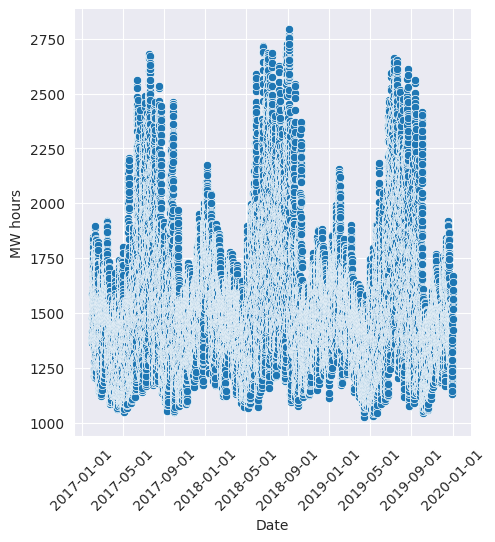

In [2]:
# Plot the training energy data over time
%matplotlib inline

sns_plot = sns.relplot(
     data=df,
     y="MW",
     x="Date"
 )
 
sns_plot.set_xticklabels(rotation = 45)
sns_plot.set_ylabels('MW hours')

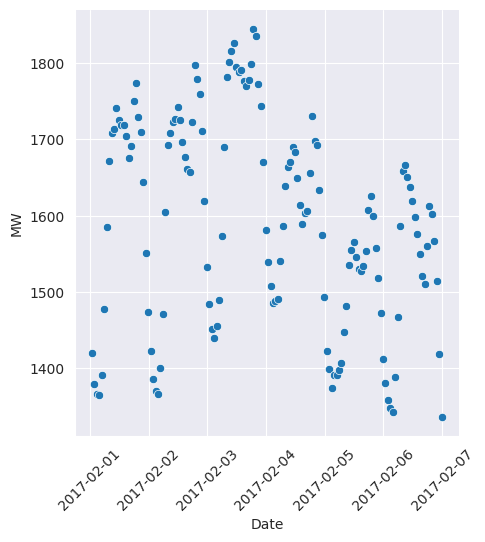

In [3]:
# Plot one week of the training energy data (energy usage on the y-axis and date on the x-axis).
%matplotlib inline

import datetime

sns_plot = sns.relplot(
    data=df[df['Date'] <= datetime.datetime(2017, 2, 7)],
    x="Date",
    y="MW"
)
sns_plot.set_xticklabels(rotation = 45)

# What overall patterns do you notice around a day of the week? How about hours in a day?

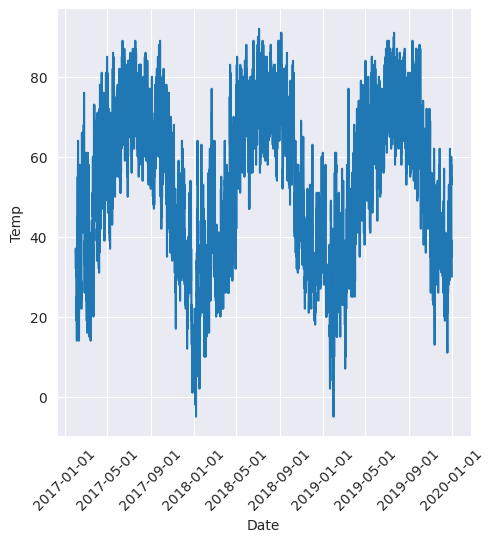

In [4]:
# Plot the training temperature data over time (temperature on the y-axis and date on the x-axis). 
# Compare the pattern that you see here to the pattern in the energy data
%matplotlib inline
"""
Takeaway: Energy consumption seem to be higher with higher temperatures.
"""

sns.relplot(
    data=df,
    x="Date",
    y="Temp",
    kind='line'
).set_xticklabels(rotation = 45)

/tmp/ipykernel_96047/3598616296.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  energy_plot.set_xticklabels(


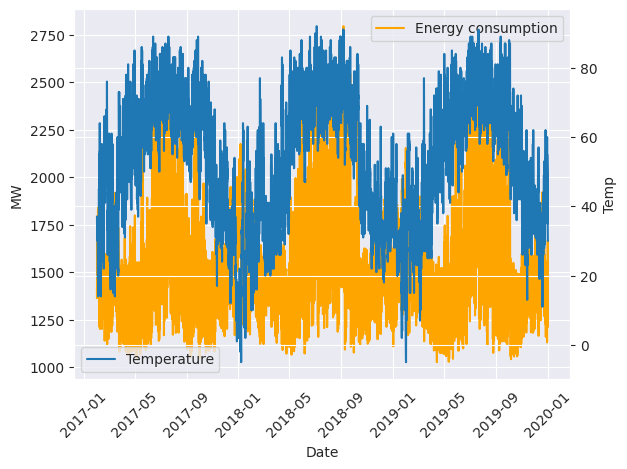

In [5]:
# It might help to overlay the plots from the energy and temperature data using a dual-axis line graph

%matplotlib inline

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

energy_plot = sns.lineplot(
    x=df['Date'],
    y=df['MW'],
    color='orange', 
    label='Energy consumption',
    ax=ax1
)
energy_plot.set_xticklabels(
    energy_plot.get_xticklabels(),
    rotation=45
)

temperature_plot = sns.lineplot(
    x=df['Date'],
    y=df['Temp'],
    label='Temperature',
    ax=ax2
)


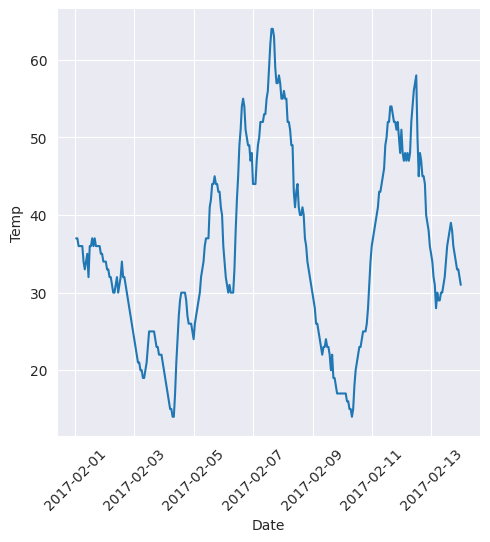

In [6]:
# Plot one week of the training temperature data
%matplotlib inline

sns.relplot(
    data=df[df['Date'] <= datetime.datetime(2017, 2, 14)],
    x="Date",
    y="Temp",
    kind='line'
).set_xticklabels(rotation = 45)

In [7]:
# Calculate the correlation of your training energy data with your training temperature data. This will give you an initial idea about possible linear relationships between temperature and energy usage

energy = df['MW']
temperature = df['Temp']

energy.corr(temperature)

0.3275395569074121

In [8]:
energy.corr(temperature, method='spearman')

0.31031864242384893

In [9]:
energy.corr(temperature, method='kendall')

0.20999511664522644

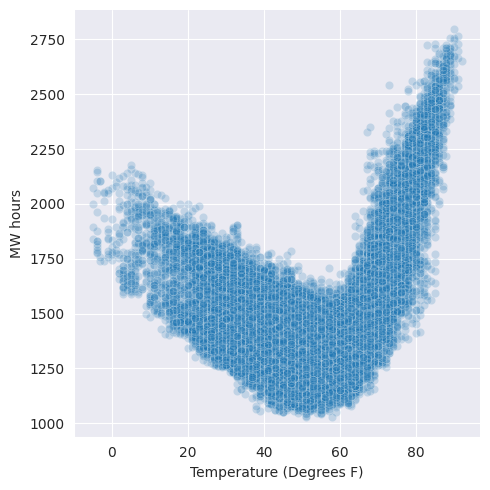

In [16]:
# Plot a scatterplot between your training temperature and energy data

%matplotlib inline

scatter_temp_energy =sns.relplot(
    alpha=0.2,
    data=df,
    x='Temp',
    y='MW'
)

scatter_temp_energy.set_ylabels('MW hours')
scatter_temp_energy.set_xlabels('Temperature (Degrees F)')
